# Laboratorium 5 – Przestrzenie ciągłe

## Autorzy
- Kacper Cienkosz
- Miłosz Dubiel

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

In [3]:
hyperparameters1 = {
    'learning_rate': 0.0001,
    'gamma': 0.99,
    'rms_prop_eps': 1e-5,
}

In [4]:
vec_env1 = make_vec_env("MountainCarContinuous-v0", n_envs=10)
model1 = A2C("MlpPolicy", vec_env1, verbose=1, **hyperparameters1)

Using cpu device


In [36]:
env1 = gym.make("MountainCarContinuous-v0")
model1.learn(total_timesteps=50000)

------------------------------------
| time/                 |          |
|    fps                | 23572    |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.33    |
|    explained_variance | 0.862    |
|    learning_rate      | 0.0001   |
|    n_updates          | 1099     |
|    policy_loss        | -0.0227  |
|    std                | 0.913    |
|    value_loss         | 0.063    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 999      |
|    ep_rew_mean        | -49.5    |
| time/                 |          |
|    fps                | 23884    |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -1.32    |
|    explained_variance | 0.944    |
|

In [37]:
model1.learn(total_timesteps=50000)

------------------------------------
| time/                 |          |
|    fps                | 24150    |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.25    |
|    explained_variance | 0.907    |
|    learning_rate      | 0.0001   |
|    n_updates          | 2099     |
|    policy_loss        | -0.0205  |
|    std                | 0.845    |
|    value_loss         | 0.00917  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 999      |
|    ep_rew_mean        | -45.9    |
| time/                 |          |
|    fps                | 24382    |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -1.24    |
|    explained_variance | 0.556    |
|

In [38]:
def evaluate_model(model, env, n_eval_episodes=10):
    rewards = []
    
    for _ in range(n_eval_episodes):
        obs = env.reset()
        episode_reward = []
        
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action)
        episode_reward.append(reward)
        
        while not done.all():
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            episode_reward.append(reward)
        rewards.append(episode_reward)
    rewards = np.array(rewards)
    mean_reward = np.mean(rewards, axis=(0, 2))
    std_reward = np.std(rewards, axis=(0, 2))
    return mean_reward, std_reward

In [39]:
evaluation = evaluate_model(model1, vec_env1)

In [40]:
evaluation

(array([-0.001576  , -0.00157592, -0.00157577, -0.00157554, -0.00157525,
        -0.00157489, -0.00157448, -0.00157403, -0.00157354, -0.00157302,
        -0.00157249, -0.00157196, -0.00157143, -0.00157091, -0.00157043,
        -0.00156997, -0.00156956, -0.00156919, -0.00156887, -0.0015686 ,
        -0.00156839, -0.00156822, -0.00156811, -0.00156804, -0.00156802,
        -0.00156803, -0.00156807, -0.00156814, -0.00156822, -0.00156831,
        -0.0015684 , -0.00156848, -0.00156856, -0.00156862, -0.00156866,
        -0.00156868, -0.00156867, -0.00156865, -0.0015686 , -0.00156853,
        -0.00156845, -0.00156836, -0.00156826, -0.00156816, -0.00156808,
        -0.00156801, -0.00156796, -0.00156795, -0.00156797, -0.00156803,
        -0.00156815, -0.00156831, -0.00156852, -0.00156879, -0.00156912,
        -0.00156949, -0.0015699 , -0.00157036, -0.00157085, -0.00157137,
        -0.0015719 , -0.00157244, -0.00157297, -0.0015735 , -0.00157399,
        -0.00157445, -0.00157487, -0.00157523, -0.0

Text(0, 0.5, 'Reward')

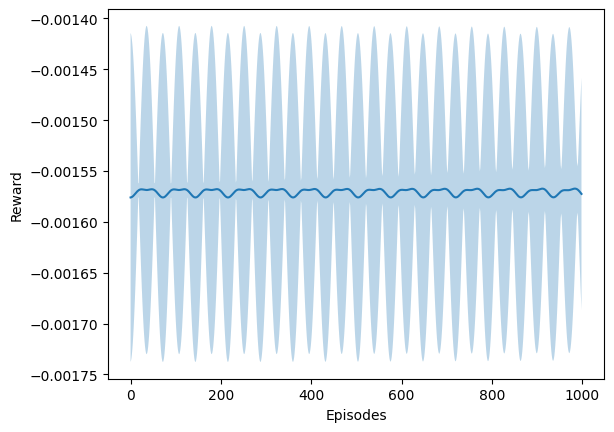

In [41]:
plt.plot(evaluation[0])
plt.fill_between(
    np.arange(len(evaluation[0])),
    evaluation[0] - evaluation[1],
    evaluation[0] + evaluation[1],
    alpha=0.3
)
plt.xlabel("Episodes")
plt.ylabel("Reward")

In [21]:
plot_results(model1, vec_env1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
!pip install 'gymnasium[classic-control]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 1.4 MB/s eta 0:00:0000:0100:01


In [44]:
obs = vec_env1.reset()
while True:
    action, _states = model1.predict(obs)
    obs, rewards, dones, info = vec_env1.step(action)
    vec_env1.render("human")

2024-05-06 09:27:40.495 Python[51276:2102583] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 